In [1]:
!pip install matplotlib

This program uses data collected from the NSRDB to predict the output power of solar panel modules.
Please enter parameters for the solar panel model you wish to simulate.


Use default parameters? (y/n):  y


Configured data saved to C:\Users\jackp\Documents\Python\EE551\Project\nsrdb_2024_configured.csv
Plot of average power per month saved as solar_power_output.png
Running model training and prediction...
Training Complete!
Final Weight : 0.29714861512184143
Final Loss: 45.229122161865234
Total Epochs: 5000
True Monthly Average Power:  ['33.9632', '63.7972', '78.6565', '93.3260', '107.2068', '129.0749', '119.1666', '102.6966', '85.2110', '80.0453', '52.5528', '39.0821']
Predicted Monthly Average Power:  ['29.6874', '57.2768', '73.2519', '89.3539', '106.3287', '131.7029', '123.1243', '104.8832', '85.2183', '77.5871', '48.9305', '34.4731']
The differnce of values are presented in the list below
['4.2759',
 '6.5204',
 '5.4045',
 '3.9721',
 '0.8781',
 '2.6279',
 '3.9578',
 '2.1866',
 '0.0073',
 '2.4582',
 '3.6223',
 '4.6090']
Monthly summary saved to: C:\Users\jackp\Documents\Python\EE551\Project\monthly_summary.csv
Exiting Program, Goodbye!


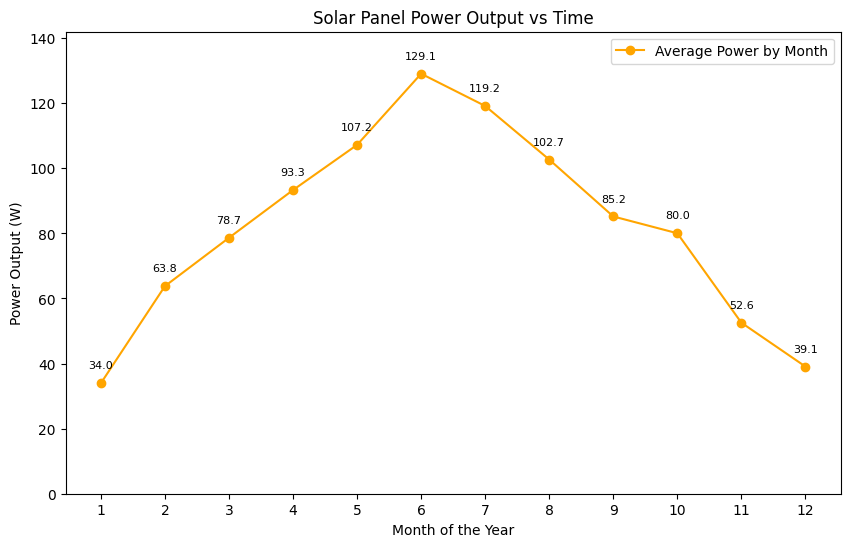

In [2]:
#Import Classes from other modules
from Data_Configuration import Data_Config as DC
from PlotAnalysis import PlotAnalysis as PA
from run_model import RunModel as RM
import raise_input
import time

file_path = "C:\\Users\\jackp\\Documents\\Python\\EE551\\Project\\nsrdb_2024.csv" #file path to raw NSRDB data

#main function to execute program
def main():
    """
    Main function to run the solar panel power output prediction program.
    Accepts user input for solar panel parameters, configures data, generates plots,
    and runs the prediction model. Outputs results of configured dataset and monthly
    power summaries of both true and predicted power outputs and saves files accordingly.
    """
    #Provide user with program information
    print("This program uses data collected from the NSRDB to predict the output power of solar panel modules.")
    print('Please enter parameters for the solar panel model you wish to simulate.')

    #User can opt to use default parameters or input their own
    if input('Use default parameters? (y/n): ') == 'y':
        config = DC(file_path) #Use default parameters in Data_Config class 
    else:
        A, E, T, N = raise_input.get_user_input()

        config = DC(file_path, A, E, T, N) #Pass attributes to Data_Config class
    #Return configured CSV file, including power output based on user parameters
    csv_file = config.configure()
    #Create PlotAnalysis object with configured CSV file
    plotter = PA(csv_file)
    #Save figure of plot analysis
    plotter.plot_power_vs_time()
    #Notify user of saved file and configured file
    time.sleep(1)  # Pause for 1 second for better user experience
    print(f'Configured data saved to {csv_file}')
    print('Plot of average power per month saved as solar_power_output.png')
    #Pass to run_model.py for training and prediction
    print('Running model training and prediction...')
    time.sleep(2)  # Pause for 2 seconds for better user experience
    runner = RM(csv_file)
    #Compute and display statistics
    time.sleep(1)  # Pause for 1 second for better user experience
    runner.compute_stats()
    runner.save_monthly_summary()
    print('Exiting Program, Goodbye!')


if __name__ == "__main__":
    main()